In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the file
df=pd.read_csv("C:/7-clustering/Assignments/crime_data.csv")

In [4]:
#step 1:Basic OVerview and Data Inspection
#take starting 5 rows and all columns so that to understand what kind of data each column has
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.tail()#it gives the last 5 rows data 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [6]:
#see all the labels of all the columns
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

so the above data is about the customer's in eastwestairlines.

1. Business Problem
1.1. What is the business objective?
the business approach of this problem is to study the customers taking the flights or they having the loyalty towards this airlines,to group or cluster the customers on the basis of their behaviour of spending the money ,customers who can afford this ,or who keeps on frequently using this airlines.Also this will help to understand the measure to be taken to increase the customers aligned more with this airlines.

1.2. Are there any constraints?
COnstaints maybe the nullvalues which cannot be deleted completely as some of the details are very crucial or sometimes the incomplete data also can act constraints.

2. Work on each feature of the dataset to create a data dictionary as displayed in the below image:
~all the data here is in integer form ~ID# - Customen's UNique Identity number. -Useful for tracking particular one ~Balance-Total miles travelled-useful for checking the distance travelled by each

In [7]:
#will check the shape of the dataset we have ie 
#the total number of rows and columns we have
df.shape

(50, 5)

In [8]:
df.info()#it gives us the number of non-null values,datatype for each column 
#also how many records are there in the dataset ie no of rows & columns"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
df['Murder'].value_counts()

Murder
13.2    2
2.2     2
9.0     2
15.4    2
2.1     2
2.6     2
6.0     2
11.1    1
13.0    1
0.8     1
7.3     1
6.6     1
4.9     1
3.4     1
6.3     1
7.4     1
14.4    1
3.8     1
12.7    1
3.2     1
8.5     1
4.0     1
5.7     1
11.4    1
2.7     1
12.2    1
4.3     1
8.1     1
8.8     1
7.9     1
3.3     1
5.9     1
17.4    1
5.3     1
10.4    1
7.2     1
9.7     1
11.3    1
4.4     1
12.1    1
10.0    1
16.1    1
6.8     1
Name: count, dtype: int64

In [11]:
df['Assault'].value_counts()

Assault
120    3
249    2
159    2
109    2
174    1
57     1
285    1
254    1
337    1
45     1
151    1
106    1
236    1
102    1
279    1
86     1
188    1
201    1
48     1
156    1
145    1
81     1
53     1
252    1
259    1
178    1
263    1
294    1
190    1
276    1
204    1
110    1
238    1
335    1
211    1
46     1
113    1
56     1
115    1
83     1
300    1
149    1
255    1
72     1
161    1
Name: count, dtype: int64

In [12]:
df['UrbanPop'].value_counts()

UrbanPop
66    4
80    4
70    2
44    2
48    2
72    2
60    2
83    2
67    2
45    2
58    1
89    1
86    1
68    1
75    1
81    1
87    1
59    1
32    1
63    1
73    1
56    1
74    1
62    1
53    1
85    1
51    1
52    1
57    1
65    1
54    1
77    1
78    1
91    1
50    1
39    1
Name: count, dtype: int64

In [13]:
df['Rape'].value_counts()

Rape
14.9    2
16.3    2
21.2    1
29.3    1
9.5     1
18.8    1
32.1    1
26.1    1
16.1    1
7.3     1
21.4    1
20.0    1
8.3     1
16.5    1
22.5    1
12.8    1
26.9    1
25.5    1
22.9    1
11.2    1
20.7    1
26.2    1
9.3     1
10.8    1
46.0    1
16.4    1
44.5    1
28.2    1
31.0    1
19.5    1
40.6    1
38.7    1
11.1    1
15.8    1
31.9    1
25.8    1
20.2    1
14.2    1
24.0    1
21.0    1
11.3    1
18.0    1
22.2    1
7.8     1
27.8    1
35.1    1
17.1    1
15.6    1
Name: count, dtype: int64

3.Missing values

In [14]:
#now lets check for the null value data in the given dataset

"""it will  return the count of null values in each column but if the column 
contains 0 then it is not considered in null value if the data is empty or
NULL then only its count will be considered """
print(df.isnull().sum())
#in this case no missing values are there so it returns 0
#if any null or missing values are there we will drop that row .
print(df.dropna())
#also we can store this value bcoz we will be using there after a new data 
#so df_new=df.dropna() we can use this aswell 

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64
        Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     

Data VIsualization for EDA

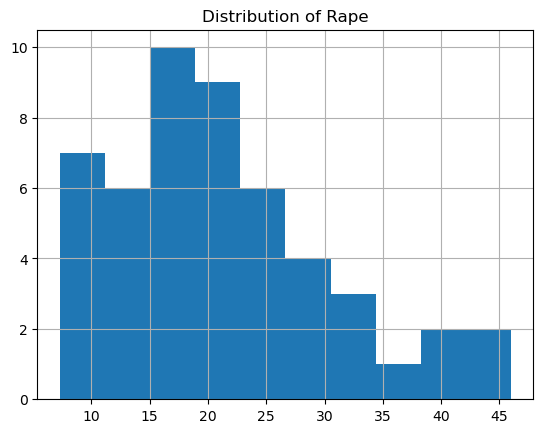

In [15]:
# 2. Univariate Analysis
df['Rape'].hist()
plt.title('Distribution of Rape')
plt.show()#lets check the histogram of the given data

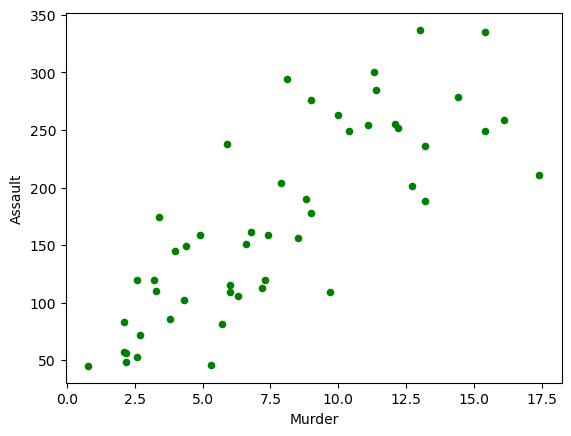

In [17]:
#3.bivariate 
#murder and assault
plt.scatter(df['Murder'], df['Assault'],s=20,color='green')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

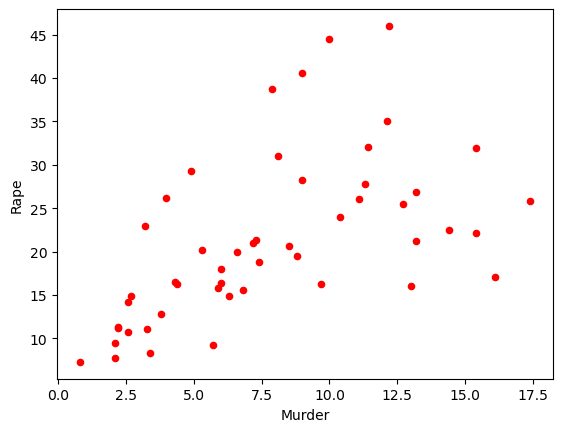

In [18]:
#murder and rape
plt.scatter(df['Murder'], df['Rape'],s=20,color='red')
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.show()

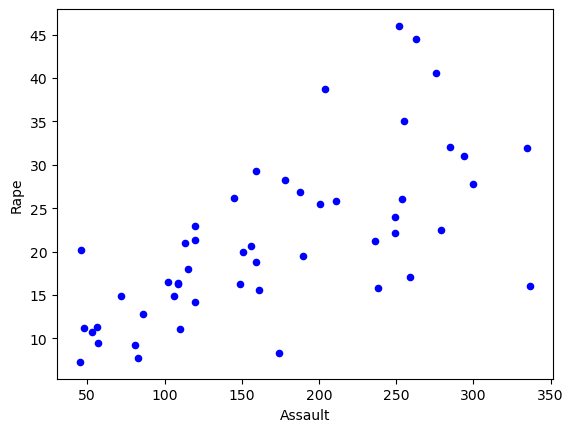

In [19]:
#RApe and assault
plt.scatter(df['Assault'], df['Rape'],s=20,color='blue')
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.show()

In [25]:
#pre process the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols=['Murder','Assault','UrbanPop','Rape']
df_scaled = scaler.fit_transform(df[cols])

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_scaled)

C:\Users\Vaishnavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
df['cluster'] = y_predicted
print(df.head())
#here we will get the clusters formed 

   Unnamed: 0  Murder  Assault  UrbanPop  Rape  cluster
0     Alabama    13.2      236        58  21.2        1
1      Alaska    10.0      263        48  44.5        1
2     Arizona     8.1      294        80  31.0        1
3    Arkansas     8.8      190        50  19.5        2
4  California     9.0      276        91  40.6        1


In [29]:
#show cluster centers
print("Cluster Centers (scaled):")
print(km.cluster_centers_)
centroids_original = scaler.inverse_transform(km.cluster_centers_)
print("Cluster Centers (original scale):")
print(centroids_original)

Cluster Centers (scaled):
[[0.16516064 0.1081621  0.32627119 0.11670973]
 [0.68463855 0.72003425 0.61694915 0.56498708]
 [0.29852744 0.32420091 0.67608286 0.29443009]]
Cluster Centers (original scale):
[[  3.54166667  76.58333333  51.25        11.81666667]
 [ 12.165      255.25        68.4         29.165     ]
 [  5.75555556 139.66666667  71.88888889  18.69444444]]


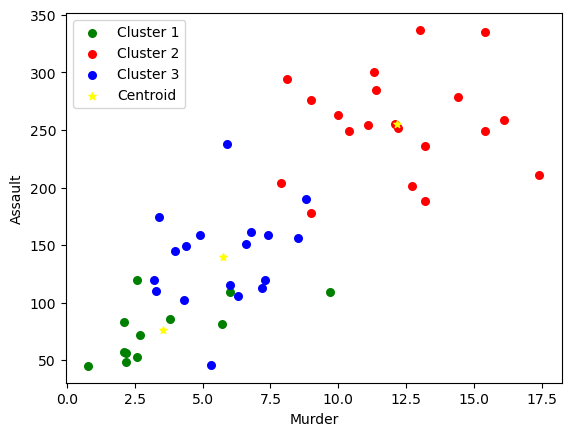

In [31]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['Murder'], df1['Assault'], color='green', label='Cluster 1',s=30)
plt.scatter(df2['Murder'], df2['Assault'], color='red', label='Cluster 2',s=30)
plt.scatter(df3['Murder'], df3['Assault'], color='blue', label='Cluster 3',s=30)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], color='yellow', marker='*', s=30, label='Centroid')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

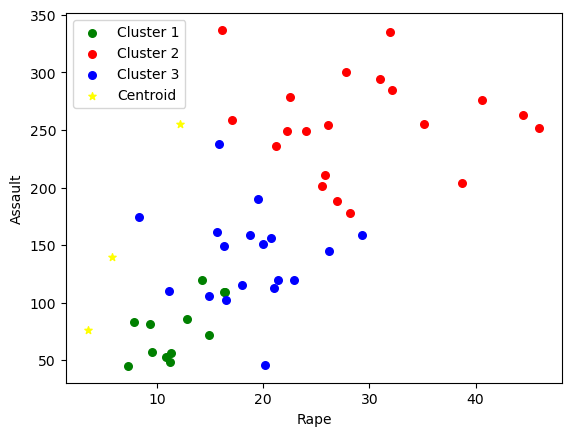

In [32]:
plt.scatter(df1['Rape'], df1['Assault'], color='green', label='Cluster 1',s=30)
plt.scatter(df2['Rape'], df2['Assault'], color='red', label='Cluster 2',s=30)
plt.scatter(df3['Rape'], df3['Assault'], color='blue', label='Cluster 3',s=30)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], color='yellow', marker='*', s=30, label='Centroid')
plt.xlabel('Rape')
plt.ylabel('Assault')
plt.legend()
plt.show()